# Машинное обучение, DS-поток
## Задание 1.3


**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Теоретические задачи необходимо оформить в LaTeX/markdown или же прислать фотку в правильной ориентации рукописного решения, **где все четко видно**.

**Баллы за задание:**

* Задача 1 — 1 балл
* Задача 2 — 1 балл
* Задача 3 — 3 балла
* Задача 4 — 1 балл
* Задача 5 — 7 баллов

## Теория

Рассмотрим задачу бинарной классификации, причем $\mathscr{Y} = \{+1, -1\}$. Пусть так же $\widehat{y}$ &mdash; некоторый классификатор, предсказывающий степень принадлежности классу. При этом решающее правило имеет вид 
 $f(x) = \text{sign}\left(\widehat{y}(x)\right)$.
Рассмотрим логистическую функцию потерь:
$$\mathcal{L}(y, z) = \log \big(1 + \exp(-yz) \big)$$

### Задача 1

Покажите, что задача минимизации функционала ошибки $Q(\widehat{y}) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, \widehat{y}(x_i)\right)$ для логистической функции потерь эквивалентна максимизации по $y$ функции правдоподобия в предположении $Y_i \sim Bern(\sigma(X_i)), Y_i \in \{-1, +1 \}$.

### Задача 2

Рассмотрим градиентный бустинг с логистической функцией потерь. Выпишите для градиентного спуска формулу для вектора сдвигов и задачу поиска новой базовой модели. 

### Задача 3

Предположим, модель градиентного бустинга $\widehat{y}_{t - 1}$ уже построена.
1. Выпишите вид функционала ошибки $Q(\widehat{y}_t) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, \widehat{y}_t(x_i)\right)$ для логистической функции потерь. Одинаковый ли вклад вносят разные объекты в ошибку?
2. Посмотрите на формулу для вектора сдвигов, полученную в предыдущей задаче. Как она выражается через отклики на объектах обучающей выборки? Одинаковый ли вклад вносят разные объекты в формирование вектора сдвигов?
3.  На лекции было показано, что для экспоненциальной функции есть проблема: базовый классификатор может настраиваться только на шумовые объекты. Наблюдается ли такая проблема у логистической функции потерь? Как она ведет себя на объектах с сильно отрицательным, околонулевым, сильно положительным отсупами?

### Задача 4

Рассмотрим градиентный бустинг над решающими деревьями. После построения дерева будем делать перенастройку в листьях дерева.
1. Выпишите оптимизационную задачу для коэффициентов $\gamma_{tj}$ &mdash; новых ответов в листьях.
2. Решите полученную задачу сделав один шаг метода Ньютона из начального приближения $\gamma_{tj} = 0$, что соответствует отсутствию базовой модели $b_t$.


## Практика

### Задача 5

**Внимание!** 

Перед выполнением задачи прочитайте полностью условие. В задаче используются смеси различных моделей с разными гиперпараметрами. Подумайте над тем, какой гиперпараметр как подбирать и на каком множестве. Не забудьте, что на тестовой выборке, по которой делаются итоговые выводы, ничего не должно обучаться.

In [55]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as mse
from sklearn.utils import shuffle

sns.set(style='whitegrid', font_scale=1.4, palette='Set2')

### 1.

Повторите исследование, проведенное в задаче 2 предыдущего домашнего задания, используя градиентный бустинг из `sklearn`. Сравните полученные результаты со случайным лесом. 

Вкратце опишем задания:
1. Посмотрите, как меняется качество модели в зависимости от значений гиперпараметров и сделайте выводы по результатам. Гиперпараметры:
    * количество деревьев (`n_estimators`) [от 1 до 400];
    * максимальная глубина дерева (`max_depth`) [от 3 до 15];
    * скорость обучения (`learning_rate`), поясните также смысл этого параметра.
2. Запустите модель три раза с параметрами по-умолчанию. Объясните результаты.
3. Подберите оптимальные гиперпараметры, рассмотренные в первом пункте и зафиксируйте их.
4. Исследуйте зависимость метрики от количества признаков, по которым происходит разбиение в вершине дерева. Объясните результаты.

*Замечания.*
* В качестве основы можно использовать как свое решение предыдущего задания, так и выложенное на Вики. В большинстве случаев нужно только заменить `RandomForestRegressor` на `GradientBoostingRegressor`.
* При сравнении методов по одинаковым свойствам желательно рисовать результаты на одном графике.
* Обратите внимание на метод `staged_predict` у `GradientBoostingRegressor`. Он позволяет получить "кумулятивные" предсказания, то есть по первым $t$ деревьям по всем значениям $t$.
* При желании, границы рассмотрения значений гиперпараметров можно увеличить.
* При подборе гиперпараметров при помощи рандомизированного поиска проводите достаточное количество на большой сетке параметров &mdash; как минимум 50. Даже если долго обучается.

In [56]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=17
)

In [ ]:
def plot_dependence_test(param_grid, test_values_tree, test_values_boosting, param_label,
                         metrics_label, title,ylim_parametr=None):
    '''
    Функция для построения графиков зависимости целевой метрики 
    от некоторого параметра модели на валидационной выборке.
    
    Параметры.
    1) param_grid — значения исследуемого параметра,
    2) test_values — значения метрики на валидационной выборке,
    3) param_label — названия параметра,
    4) metrics_label — название метрики,
    5) title — заголовок для графика.
    '''
    
    plt.figure(figsize=(18, 9))
    plt.plot(param_grid, test_values_tree, label='test, RandomForest', linewidth=3) if test_values_tree!=None else None
    plt.plot(param_grid, test_values_boosting, label='test, GradientBoosting', linewidth=3)
   
    plt.xlabel(param_label)
    plt.ylabel(metrics_label)
    plt.legend()
    plt.title(title)
    if ylim_parametr!=None:
      plt.ylim(*ylim_parametr)
    plt.show()

In [ ]:
regressor = RandomForestRegressor(n_estimators=400, random_state=42)
regressor.fit(X_train, y_train)

predictions_by_tree = np.array(
    [tree.predict(X_test) for tree in regressor.estimators_]
)

n_estimators_grid = np.arange(1, 401)
predictions = np.cumsum(predictions_by_tree, axis=0) \
                / n_estimators_grid[:, np.newaxis]
mse_values_forest = [mse(y_test, p) for p in predictions]


#теперь GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators=400, random_state=42)
regressor.fit(X_train, y_train)
predictions=regressor.staged_predict(X_test)
mse_values_boosting = [mse(y_test, p) for p in predictions]

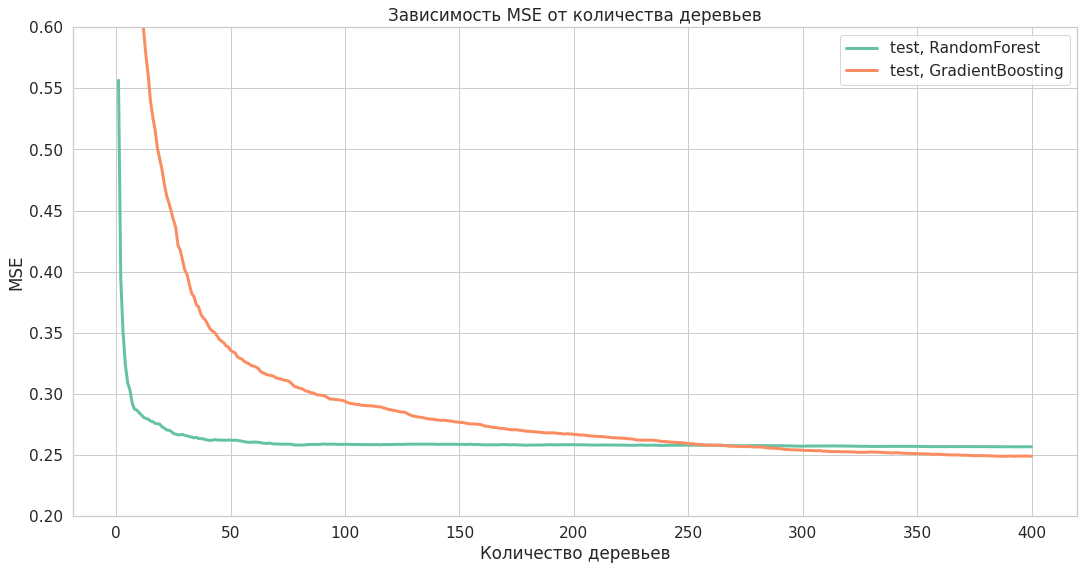

In [ ]:
plot_dependence_test(n_estimators_grid, mse_values_forest, mse_values_boosting,
                     'Количество деревьев', 'MSE', 
                     'Зависимость MSE от количества деревьев',ylim_parametr=[0.2,0.6])

На количестве деревьев меньше 250 RandomForest показывает более хороший результат, причем он более резко и быстрей достигает хороших показателей MSE.Но затем когда у нас кол-во деревьев порядка 250 и больше, уже GradientBoosting показывается себя более хорошее и начинает работать слегка лучше, чем RandomForest. 

In [ ]:
mse_values_forest = []
mse_values_boosting=[]
for max_depth in tqdm(range(3, 16)):
    regressor = RandomForestRegressor(max_depth=max_depth, 
                                      n_estimators=270, random_state=42)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    mse_values_forest.append(mse(y_test, predictions))

    regressor = GradientBoostingRegressor(max_depth=max_depth, 
                                      n_estimators=270, random_state=42)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    mse_values_boosting.append(mse(y_test, predictions))

  0%|          | 0/13 [00:00<?, ?it/s]

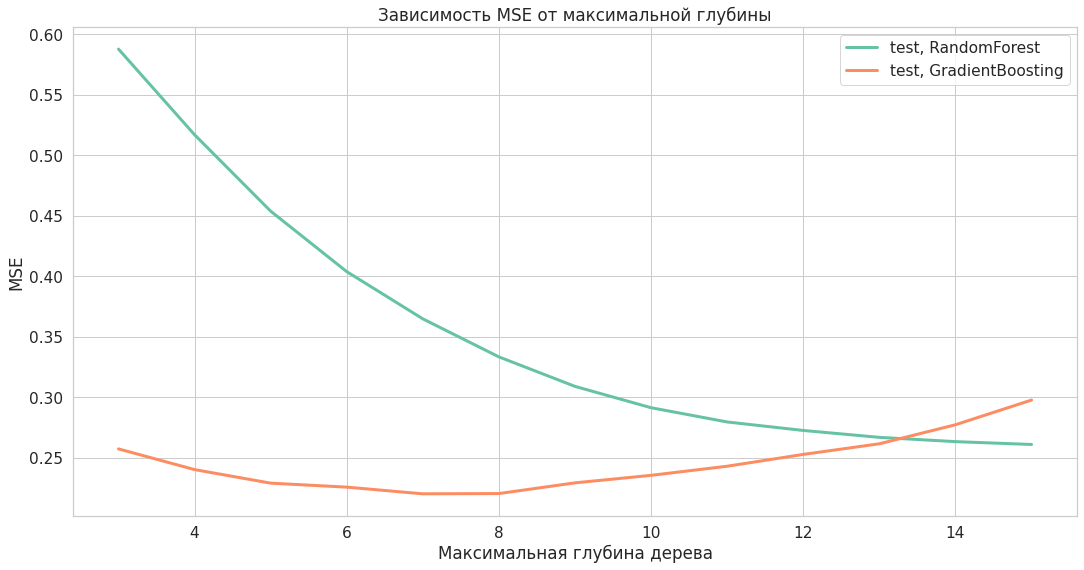

In [ ]:
plot_dependence_test(np.arange(3, 16), mse_values_forest, mse_values_boosting, 
                     'Максимальная глубина дерева', 'MSE', 
                     'Зависимость MSE от максимальной глубины')

Тут даже при маленькой глубине показатели GradientBoosting уже показывает хорошие результаты, но при росте глубины дерева у нас наблюдается переобучение (которое отсутствует у RandomForest), поэтому оптимальная глубина в нашем случае порядка 6-8 для GradientBoosting. Но важное наблюдаемое св-во, что GradientBoosting начинает переобучаться причем даже не на оч большой глубине

In [ ]:
mse_values_boosting=[]
grid=np.logspace(-6,0,20)
for learning_rate in tqdm(grid):
    regressor = GradientBoostingRegressor(learning_rate=learning_rate, 
                                      n_estimators=350, random_state=42)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    mse_values_boosting.append(mse(y_test, predictions))

  0%|          | 0/20 [00:00<?, ?it/s]

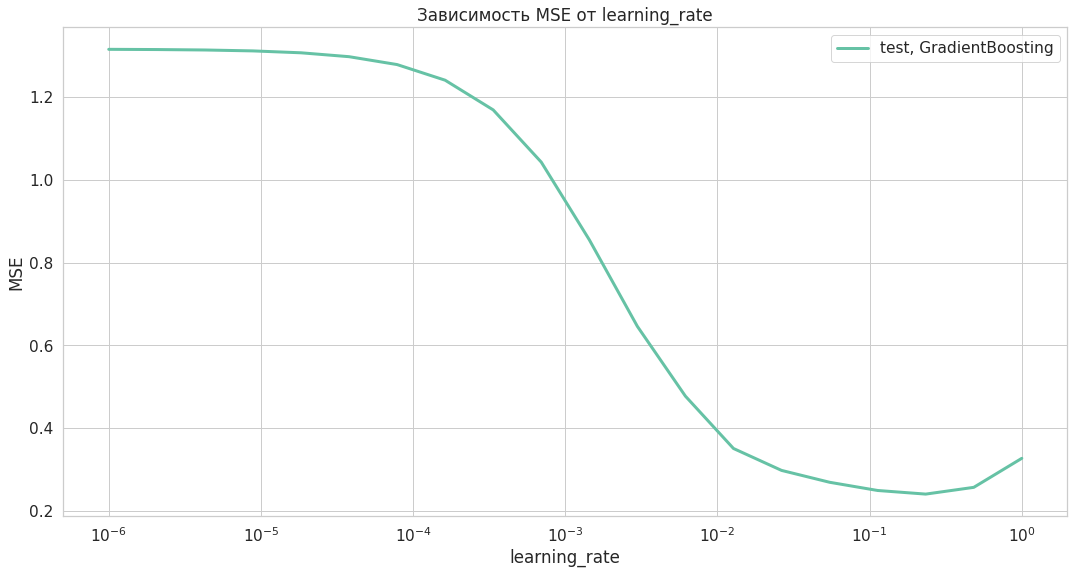

In [ ]:
plt.figure(figsize=(18, 9))
plt.plot(grid, mse_values_boosting, label='test, GradientBoosting', linewidth=3)
plt.xlabel('learning_rate')
plt.ylabel('MSE')
plt.legend()
plt.title('Зависимость MSE от learning_rate')
plt.xscale("log")
plt.show()

Самое лучшее MSE у нас достигается при learning_rate=0.5, learning_rate влияет с каким большим шагом мы будем идти по направлению антиградиента, также это влияет на возможность перешагнуть оптимальное значение, поэтому чем меньше, тем более маленькими, но точными шагами мы идем в нужном направлении. 

In [65]:
for iteration in tqdm(range(3)):
    regressor = GradientBoostingRegressor(n_estimators=350)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    print('MSE = {:.4f}'.format(mse(y_test, predictions)))

  0%|          | 0/3 [00:00<?, ?it/s]

MSE = 0.2512
MSE = 0.2511
MSE = 0.2511


Видно, что 2 значения совпали, а третье очень близко к ним. Это отличается от ситуации с RandomForest, который каждый раз использовал бустрепные выборки. GradientBoostingRegressor же не использует бустрепные выборки (у него даже нет такого параметра в модели)

In [ ]:
grid=np.append(np.logspace(-6,0,10),np.linspace(0.1,0.7,10))
rnd_boosting_gridsearch = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions={
        'n_estimators': np.arange(1,401),
        'learning_rate': grid,
        'max_depth': np.arange(3,16),
    },
    cv=5,  # разбиение выборки на 5 фолдов
    verbose=1,  # насколько часто печатать сообщения
    n_jobs=-1,  # кол-во параллельных процессов
    n_iter=50,  # кол-во итераций случайного выбора гиперпараметров
    random_state=42  # seed для фиксирования случайности
)
rnd_boosting_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([1.00000000e-06, 4.64158883e-06, 2.15443469e-05, 1.00000000e-04,
       4.64158883e-04, 2.15443469e-03, 1.00000000e-02, 4.64158883e-02,
       2.15443469e-01, 1.00000000e+00, 1.00000000e-01, 1.66666667e-01,
       2.33333333e-01, 3.00000000e-01...
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
       391, 392, 393, 394, 395, 396, 397, 398, 399, 400])},
                   random_state=42, verbose=1)

In [ ]:
rnd_boosting_gridsearch.best_params_

{'learning_rate': 0.16666666666666669, 'max_depth': 7, 'n_estimators': 351}

In [ ]:
max_depth = rnd_boosting_gridsearch.best_params_['max_depth']
n_estimators = rnd_boosting_gridsearch.best_params_['n_estimators']
learning_rate = rnd_boosting_gridsearch.best_params_['learning_rate']

In [ ]:
print('train mse {:.4f}'.format(
    mse(rnd_boosting_gridsearch.predict(X_train), y_train)
))
print('test mse {:.4f}'.format(
    mse(rnd_boosting_gridsearch.predict(X_test), y_test)
))

train mse 0.0165
test mse 0.2262


Теперь исследуем количество признаков

In [ ]:
def plot_dependence(param_grid, train_values, test_values, 
                    param_label='', metrics_label='', title='',
                    train_label='train (RandomForest)', 
                    test_label='test (RandomForest)', 
                    create_figure=True):
    '''
    Функция для построения графиков зависимости целевой метрики 
    от некоторого параметра модели на обучающей и на валидационной 
    выборке.
    
    Параметры.
    1) param_grid — значения исследуемого параметра,
    2) train_values — значения метрики на обучающей выборке,
    3) test_values — значения метрики на валидационной выборке,
    4) param_label — названия параметра,
    5) metrics_label — название метрики,
    6) title — заголовок для графика,
    7) create_figure — флаг, устанавливающий нужно ли создавать 
    новую фигуру для графика.
    '''
    
    if create_figure:
        plt.figure(figsize=(12, 6))
    plt.plot(param_grid, train_values, label=train_label, linewidth=3)
    plt.plot(param_grid, test_values, label=test_label, linewidth=3)
       
    plt.legend()
    if create_figure:
        plt.xlabel(param_label)
        plt.ylabel(metrics_label)
        plt.title(title, fontsize=20)

In [ ]:
mse_train_values = []
mse_test_values = []
simple_mse_train_values = []
simple_mse_test_values = []

for n_features in tqdm(range(1, 9)):
    rf_regressor = RandomForestRegressor(
        max_depth=26, n_estimators=226, 
        max_features=n_features, random_state=42#оптимальные параметры, найдены в прошлом дз
    )
    rf_regressor.fit(X_train, y_train)
    
    current_train_mse = mse(y_train, rf_regressor.predict(X_train))
    current_test_mse = mse(y_test, rf_regressor.predict(X_test))
       
    mse_train_values.append(current_train_mse)
    mse_test_values.append(current_test_mse)


    rf_regressor = GradientBoostingRegressor(
            max_depth=max_depth,n_estimators=n_estimators,
            learning_rate=learning_rate, random_state=42,
            max_features=n_features)
    
    rf_regressor.fit(X_train, y_train)
    current_train_mse = mse(y_train, rf_regressor.predict(X_train))
    current_test_mse = mse(y_test, rf_regressor.predict(X_test))
    
    simple_mse_train_values.append(current_train_mse)
    simple_mse_test_values.append(current_test_mse)

  0%|          | 0/8 [00:00<?, ?it/s]

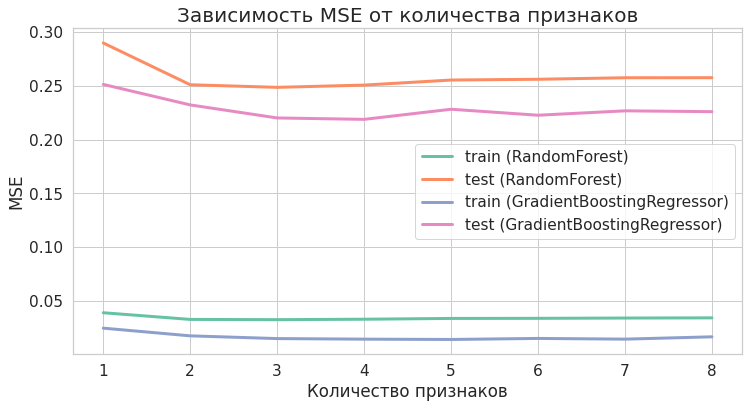

In [ ]:
plot_dependence(range(1, 9), mse_train_values, mse_test_values, 
                'Количество признаков', 'MSE', 
                'Зависимость MSE от количества признаков')
plot_dependence(range(1, 9), simple_mse_train_values, 
                simple_mse_test_values,
                train_label='train (GradientBoostingRegressor)', 
                test_label='test (GradientBoostingRegressor)',
                create_figure=False)

Тут заметна разница, на Test and Train RandomForest работает лучше, нет огромной разницы, но при этом она все-таки хорошо заметна. Если внимательно посомтреть на test, но хорошо видно, что после 4-5 признаков mse слегка ухудшается=у нас модели немного переобучаются

### 3.

Обучите градиентный бустинг на решающих деревьях, у которого в качестве инициализирующей модели используется линейная регрессия. 

Для этого используйте класс `GradientBoostingRegressor`, которому при инициализации в качестве параметра `init` передайте модель ридж-регрессии `Ridge`, которая должна быть инициализирована, но необучена. Параметр `init` задает модель, выполняющую начальные предсказания, с которых стартует построение ансамбля.

Подберите оптимальные гиперпараметры такой композиции. Как вы будете подбирать гиперпараметр ридж-регрессии? Улучшилось ли качество модели на тестовой выборке?

*Замечания.* 

1. Чтобы понять, как настроить `alpha` в `Ridge` модели внутри `GradientBoostingRegressor` вам может помочь метод `get_params()` у бустинга.
2. Не забывайте, что у бустинга тоже есть параметр `alpha`, не перепутайте их.

In [ ]:
rnd_boosting_gridsearch = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42,init=Ridge()),
    param_distributions={
        'n_estimators': np.arange(1,401),
        'learning_rate': grid,
        'max_depth': np.arange(3,16),
        'init__alpha': np.logspace(-8,3,100)
    },
    cv=5,  # разбиение выборки на 5 фолдов
    verbose=0,  # насколько часто печатать сообщения
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=50,  # кол-во итераций случайного выбора гиперпараметров
    random_state=42  # seed для фиксирования случайности
)
rnd_boosting_gridsearch.fit(X_train, y_train)

In [61]:
rnd_boosting_gridsearch.best_params_

{'init__alpha': 3.5938136638046257e-06,
 'learning_rate': 0.12915496650148828,
 'max_depth': 8,
 'n_estimators': 312}

In [63]:
print('train mse {:.4f}'.format(
    mse(rnd_boosting_gridsearch.predict(X_train), y_train)
))
print('test mse {:.4f}'.format(
    mse(rnd_boosting_gridsearch.predict(X_test), y_test)
))

train mse 0.0131
test mse 0.2254


Тут мы нашли оптимальные параметры, но по сравнению с пред. номерами, мы такжи нашли параметр регуляризации Ridge регрессии, которая используется для начального приближения. Оптимальный параметр init__alpha= $10^{-6}$, то есть регуляризация почти не используется. Также вспомним,что без данного параметра train mse 0.0165 test mse 0.2262. То есть мы улучшили mse в тесте и трейне на 1 сотую примерно

### 4. 

Рассмотрим модели смеси градиентного бустинга $\widehat{y}_{gb}$ и случайного леса $\widehat{y}_{rf}$ в виде
$$\widehat{y}(x) = w \widehat{y}_{gb}(x) +  (1-w) \widehat{y}_{rf}(x),$$
где $w \in [0, 1]$ &mdash; коэффициент усреднения. Подберите оптимальное значение гиперпараметра $w$. Удалось ли добиться улучшения качества на тестовой выборке?

In [ ]:
class sum_forest_boosting(RandomForestRegressor,GradientBoostingRegressor):
  def __init__(self, w=0):
    self.rf_regressor = RandomForestRegressor(
        max_depth=26, n_estimators=226, random_state=42#оптимальные параметры, найдены в прошлом дз
    )
    self.boosting_regressor = GradientBoostingRegressor(learning_rate=0.16666666666666669, 
                                      max_depth=7, n_estimators=351, random_state=42)
    self.w=w
  def fit(self, X_train, y_train):
    self.rf_regressor.fit(X_train, y_train)
    self.boosting_regressor.fit(X_train, y_train)
  def predict(self, X_test):
    predictions1 = self.rf_regressor.predict(X_test)
    predictions2 = self.boosting_regressor.predict(X_test)
    predictions1=np.array(predictions1)
    predictions2=np.array(predictions2)
    return self.w*predictions1+(1-self.w)*predictions2


In [ ]:
%%time
model = GridSearchCV(
    estimator=sum_forest_boosting(),
    param_grid={
        'w': np.linspace(0,1,20)},
    cv=5,  # разбиение выборки на 5 фолдов
    verbose=1,  # насколько часто печатать сообщения
    n_jobs=-2,  # кол-во параллельных процессов
)
model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 29min 32s


GridSearchCV(cv=5, estimator=sum_forest_boosting(), n_jobs=-2,
             param_grid={'w': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             verbose=1)

In [ ]:
model.best_params_

{'w': 0.21052631578947367}

In [ ]:
rf_regressor = RandomForestRegressor(
            max_depth=26, n_estimators=226, random_state=42)#оптимальные параметры, найдены в прошлом дз)
boosting_regressor = GradientBoostingRegressor(learning_rate=0.16666666666666669, 
                                          max_depth=7, n_estimators=351, random_state=42)
rf_regressor.fit(X_train, y_train)
boosting_regressor.fit(X_train, y_train)

predictions1 = rf_regressor.predict(X_test)
predictions2 = boosting_regressor.predict(X_test)
    
print('mse RandomForestRegressor',mse(y_test, predictions1))
print('mse GradientBoostingRegressor',mse(y_test, predictions2))  
print('mse суммы двух моделей',mse(y_test, model.predict(X_test)))


mse RandomForestRegressor 0.25782144959997183
mse GradientBoostingRegressor 0.22618714475498625
mse суммы двух моделей 0.2225925499895831


Для данной задачи мы сначала реализовали общий класс, который принимает две наши модели, обучается и считает предсказания, а затем мы умножили одно предсказание на w, а другое на (1-w). Оптимальным параметром оказался w=0.21. То есть с w=0.21 мы учитываем ответы, полученные RandomForest, а с 0.79 учитываем GradientBoostingRegressor. По итогу мы смогли улучшить каждую модель, то есть суммарный результат лучше, чем у двух данных моделей по отдельности, тем самым комбинируя с разными коэф. разные модели мы можем получать модель с более хорошей метрикой, чем у каждой по отдельности. Также у нас бустинг сработал лучше, чем RandomForest, но маленькая доля RandomForest внесла плюс в нашу модель и позволила предсказывать с более маленькой ошибкой.